In [1]:
import sys
import os
import numpy as np
import pandas as pd
sys.path.append(os.path.dirname(os.path.dirname(os.path.dirname(os.path.abspath('"Top 10 Funds by AUM Positioning - Data Gen.ipynb"')))))
sys.path.append(os.path.dirname(os.path.dirname(os.path.dirname(os.path.abspath('"Top 10 Funds by AUM Positioning - Data Gen.ipynb"')))))
import apis.qe.myqengine as qe

Python-dotenv could not parse statement starting at line 5


In [2]:
time_series = qe.TimeSeries(start_date = '-23M',end_date = '0M', frequency='M',calendar='NAY')

univ = qe.IdUniverse(ids = ['AAPL-US','META-US','AMZN-US','NVDA-US','GOOGL-US','MSFT-US','TSLA-US'],universe_type='Equity')
req = qe.calculate(universe = univ, dates = time_series,formulas = ["FE_BROKER_ESTIMATE(SNAP,EPS,BKR_NAME,ANN_ROLL,+1,#DATE,,',AWIN=1D,ESTDATE=INPUT,WIN=31,')",
                                            "FE_BROKER_ESTIMATE(SNAP,EPS,AN_NAME,ANN,+1,#DATE,,'WIN=31,AWIN=1D,ESTDATE=INPUT,')",
                                           "FE_BROKER_ESTIMATE(SNAP,EPS,EST_VALUE,ANN,+1,#DATE,,'WIN=31,AWIN=1D,ESTDATE=INPUT')",
                                           "FE_BROKER_ESTIMATE(SNAP,EPS,PREV_VALUE,ANN,+1,#DATE,,'WIN=31,AWIN=1D,ESTDATE=INPUT')",
                                        "FE_BROKER_ESTIMATE_DATE(SNAP,EPS,INPUTDATETIME,ANN,+1,'YYYYMMDD',#DATE,,'AWIN=1D,ESTDATE=INPUT,WIN=31')",
                                        "FE_BROKER_ESTIMATE(SNAP,EPS,AN_ENTITY_ID,ANN,+1,#DATE,,',AWIN=1D,ESTDATE=INPUT,WIN=31,')",
                                        "P_PRICE_RETURNS(1,20220831,#DATE,RANGE,USD)"],
                                        source = 'FqlExpression',
                                        is_array_return_type=True)


In [3]:

df = req.data.rename(columns={'UNIVERSE':"Ticker"}).set_index("Ticker")
df.head()

,DATE,"FE_BROKER_ESTIMATE(SNAP,EPS,BKR_NAME,ANN_ROLL,+1,#DATE,,',AWIN=1D,ESTDATE=INPUT,WIN=31,')","FE_BROKER_ESTIMATE(SNAP,EPS,AN_NAME,ANN,+1,#DATE,,'WIN=31,AWIN=1D,ESTDATE=INPUT,')","FE_BROKER_ESTIMATE(SNAP,EPS,EST_VALUE,ANN,+1,#DATE,,'WIN=31,AWIN=1D,ESTDATE=INPUT')","FE_BROKER_ESTIMATE(SNAP,EPS,PREV_VALUE,ANN,+1,#DATE,,'WIN=31,AWIN=1D,ESTDATE=INPUT')","FE_BROKER_ESTIMATE_DATE(SNAP,EPS,INPUTDATETIME,ANN,+1,'YYYYMMDD',#DATE,,'AWIN=1D,ESTDATE=INPUT,WIN=31')","FE_BROKER_ESTIMATE(SNAP,EPS,AN_ENTITY_ID,ANN,+1,#DATE,,',AWIN=1D,ESTDATE=INPUT,WIN=31,')","P_PRICE_RETURNS(1,20220831,#DATE,RANGE,USD)"
Ticker,,,,,,,,
AAPL-US,20210831,"[Evercore ISI, Monness, Crespi, Hardt, Bernste...","[Harsh V. Kumar, Samik Chatterjee, Sidney Ho, ...","[5.67, 6.55, 6.262656, 6.5]","[5.67, 6.55, 6.262656, 6.5]","[20210826, 20210819, 20210805, 20210803]","[05S4ZR-E, 08H1KV-E, 05QKRD-E, 0LDWWB-E]",[4.142785]
META-US,20210831,"[Monness, Crespi, Hardt, Roth MKM, Cleveland R...","[Rocco Strauss, Alan Gould, Ishan Majumdar, Sa...","[19.3, 18.71, 18.41, 19.87]","[19.3, 18.71, 18.41, 19.87]","[20210824, 20210818, 20210810, 20210804]","[0BRVMY-E, 061DF1-E, 0M1ZTB-E, 07D4NL-E]",[-57.053616]
AMZN-US,20210831,"[Evercore ISI, Monness, Crespi, Hardt, Roth MK...","[Ishan Majumdar, Satoshi Tanaka]","[3.889, 4.696]","[3.889, 4.696]","[20210811, 20210805]","[0M1ZTB-E, 07D4NL-E]",[-26.950354]
NVDA-US,20210831,"[Argus Research, Mizuho Securities USA, Piper ...","[Louis Miscioscia, Pierre Ferragu, Shebly Seyr...","[5.33, 4.98, 5.35, 5.03, 4.86, 5.37, 7.25, 4.9...","[5.33, 4.98, 5.35, 5.03, 4.86, 5.37, 7.25, 4.9...","[20210825, 20210819, 20210820, 20210819, 20210...","[05KTQF-E, 079CVR-E, 05LK4X-E, 07NZLR-E, 05QHC...",[-32.517307]
GOOGL-US,20210831,"[Monness, Crespi, Hardt, Cleveland Research Co...","[Richard Kramer, Christophe Cherblanc, Ishan M...","[6.09, 6.21, 5.9475]","[6.09, 6.21, 5.9475]","[20210824, 20210809, 20210810]","[06XZ5Q-E, 06QBW9-E, 0M1ZTB-E]",[-25.209486]


In [4]:
df= df.rename(columns = {"FE_BROKER_ESTIMATE(SNAP,EPS,BKR_NAME,ANN_ROLL,+1,#DATE,,',AWIN=1D,ESTDATE=INPUT,WIN=31,')":"Broker Name",
                     "FE_BROKER_ESTIMATE(SNAP,EPS,AN_NAME,ANN,+1,#DATE,,'WIN=31,AWIN=1D,ESTDATE=INPUT,')":'Analyst Name',
                    "FE_BROKER_ESTIMATE(SNAP,EPS,EST_VALUE,ANN,+1,#DATE,,'WIN=31,AWIN=1D,ESTDATE=INPUT')":"EST_EPS_FY1",
                    "FE_BROKER_ESTIMATE(SNAP,EPS,PREV_VALUE,ANN,+1,#DATE,,'WIN=31,AWIN=1D,ESTDATE=INPUT')":"PREV_EST_EPS_FY1",
                    "FE_BROKER_ESTIMATE_DATE(SNAP,EPS,INPUTDATETIME,ANN,+1,'YYYYMMDD',#DATE,,'AWIN=1D,ESTDATE=INPUT,WIN=31')":'Research Date',
                    "FE_BROKER_ESTIMATE(SNAP,EPS,AN_ENTITY_ID,ANN,+1,#DATE,,',AWIN=1D,ESTDATE=INPUT,WIN=31,')":"Analyst ID",
                    "P_PRICE_RETURNS(1,20220831,#DATE,RANGE,USD)":"Cumulative Return",
                    "DATE":'Date'
                    })

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df['Cumulative Return']= df['Cumulative Return'].apply(lambda x:x[0])

In [7]:
import numpy as np
df_aapl = pd.concat([df['Analyst ID'].explode().reset_index()[['Ticker','Analyst ID']],df['Broker Name'].explode().reset_index().iloc[:,-1:],df['Analyst Name'].explode().reset_index().iloc[:,-1:],df['EST_EPS_FY1'].explode().reset_index().iloc[:,-1:],df['PREV_EST_EPS_FY1'].explode().reset_index().iloc[:,-1:],df['Research Date'].explode().reset_index().iloc[:,-1:]],axis=1)
df_aapl['Research Date'] = pd.to_datetime(df_aapl['Research Date'])
df_aapl = df_aapl.replace('Restricted',np.nan).replace('@NA',np.nan)
#df_aapl.to_csv('test_audit.csv')
df_aapl = df_aapl.groupby(['Research Date','Broker Name','Ticker']).agg({'EST_EPS_FY1':'mean'})

df_aapl

EST_EPS_FY1
Research Date Broker Name             Ticker               
2021-08-03    Piper Sandler Companies AAPL-US      6.500000
2021-08-04    DCFstocks               META-US     19.870000
              Edgewater Research      MSFT-US     12.950000
2021-08-05    Bernstein Research      AAPL-US      6.262656
              First Shanghai          AMZN-US      4.696000
...                                                     ...
2023-07-31    Oppenheimer             AAPL-US      5.990000
                                      GOOGL-US     6.010000
              UBS                     META-US     13.000000
              Wedbush Securities      AAPL-US      6.100000
              Wolfe Research          MSFT-US     11.090000

[3209 rows x 1 columns]

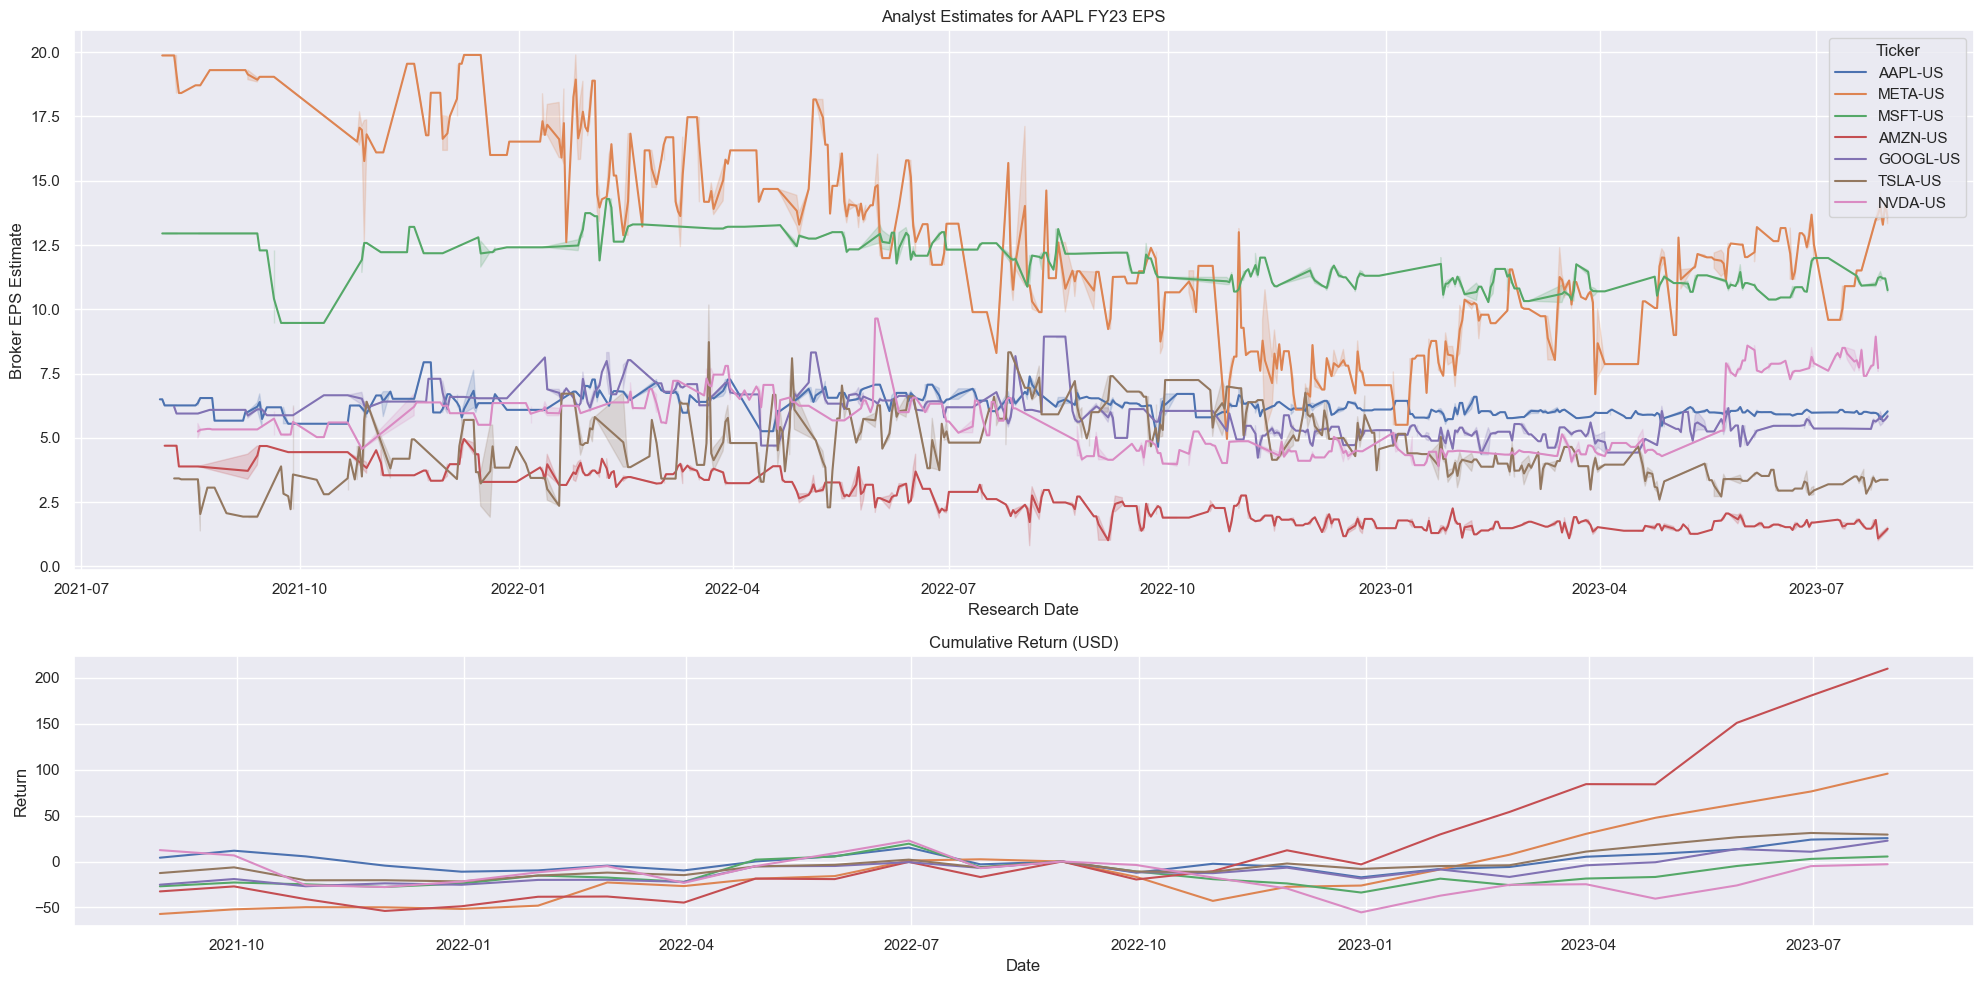

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
fig,axs = plt.subplots(2,1,figsize=(20,10),gridspec_kw={'height_ratios': [2, 1]})

sns.lineplot(df_aapl['EST_EPS_FY1'].unstack().ffill(limit = 12).stack().rename('EST_EPS_FY1').reset_index(),
                x = 'Research Date',y = 'EST_EPS_FY1',hue = 'Ticker',ax=axs[0])
axs[0].set_title('Analyst Estimates for AAPL FY23 EPS')
axs[0].set_ylabel('Broker EPS Estimate')

sns.lineplot(df.reset_index(),
                x = 'Date',y = 'Cumulative Return',hue = 'Ticker',ax=axs[1])
axs[1].set_title('Cumulative Return (USD)')
axs[1].set_ylabel('Return')
axs[1].get_legend().remove()
plt.tight_layout()

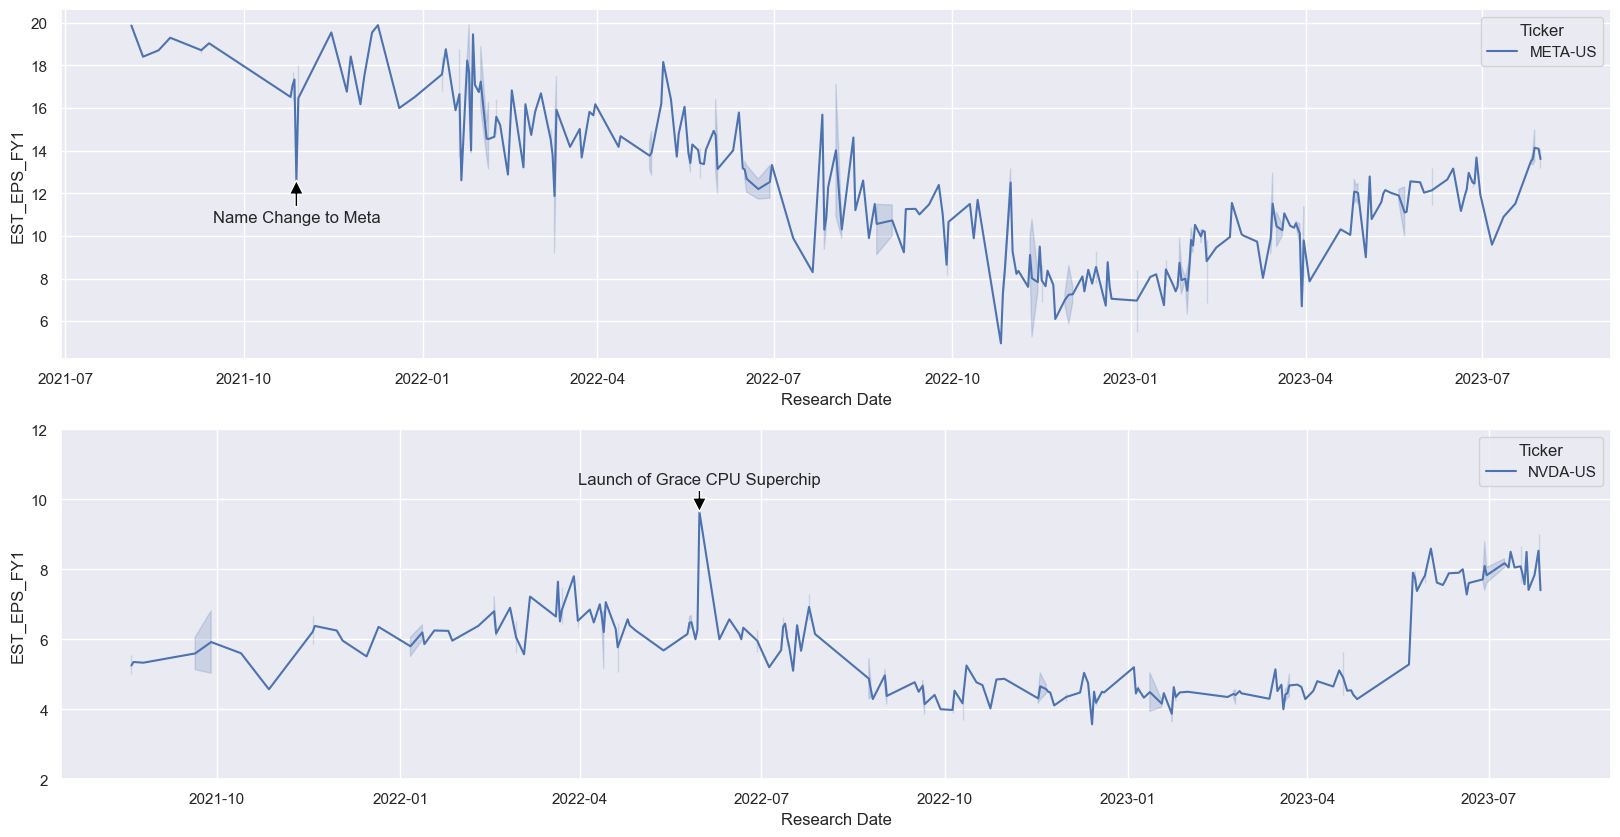

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
fig,axs = plt.subplots(2,1,figsize=(20,10))

df_mn = df_aapl.reset_index()[df_aapl.reset_index()['Ticker'].isin(['META-US'])].set_index(['Research Date','Broker Name','Ticker'])
sns.lineplot(data=df_mn['EST_EPS_FY1'].unstack().ffill(limit = 12).stack().rename('EST_EPS_FY1').reset_index(), x='Research Date', y='EST_EPS_FY1',hue='Ticker', ax=axs[0])

chosen_date1 = pd.to_datetime('2021-10-28')  # example: the latest date
chosen_y1 = df_mn.loc[chosen_date1, 'EST_EPS_FY1'].mean()  # example: the mean value on that date
axs[0].annotate('Name Change to Meta', xy=(chosen_date1, chosen_y1), xytext=(0, -30), 
                textcoords="offset points",ha='center',
                arrowprops=dict(facecolor='black', headwidth=10, width=2, headlength=10))

df_mn = df_aapl.reset_index()[df_aapl.reset_index()['Ticker'].isin(['NVDA-US'])].set_index(['Research Date','Broker Name','Ticker'])
sns.lineplot(data=df_mn['EST_EPS_FY1'].unstack().ffill(limit = 12).stack().rename('EST_EPS_FY1').reset_index(), x='Research Date', y='EST_EPS_FY1', hue='Ticker', ax=axs[1])

chosen_date2 = pd.to_datetime('2022-05-31')  # example: the latest date
chosen_y2 = df_mn.loc[chosen_date2, 'EST_EPS_FY1'].mean()  # example: the mean value on that date
axs[1].annotate('Launch of Grace CPU Superchip', xy=(chosen_date2, chosen_y2), xytext=(0, 20), 
                textcoords="offset points",ha='center',
                arrowprops=dict(facecolor='black', headwidth=10, width=2, headlength=10))

axs[1].set_ylim((2,12))

plt.show()